In [2]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import sys

In [14]:
def extract_bytes(value):
    '''
    value=32 bit integer
    returns an array of 4 bytes extracted from value
    '''
    byte_array=[]
    while value !=0:
        byte_array.append(value&0xff)
        value=value>>8
    return byte_array

def initialize_byte_dictionary(d):
    '''
    creates an empty dictionary of 256 values
    '''
    for i in range(256):
        d[i]=0
    return d
    
def process_data_in_file(file,d):
    '''
    file= a file containing 32-bit values integers
    d= a 256 value dictionary
    returns d= contains dictionary d which contains the frequency table of the bytes in file 
    '''
    file_test = open(file, "r") 
    content = file_test.readlines()
    random_data=[]
    for i,line in enumerate(content):
        #print(i)
        if i > 5:
            random_data.append(int(line))
   
    #print(len(random_data))
    initialize_byte_dictionary(d)
    count_bytes=0
    for data in random_data:
        bytes_data=extract_bytes(data)
        for b in bytes_data:
            count_bytes+=1
            d[b]+=1
    return d, count_bytes
    

In [29]:
def calc_and_plot(file):
  dict_bytes={}
  dict_bytes, count_bytes=process_data_in_file(file, dict_bytes)
  plt.bar(range(len(dict_bytes)), list(dict_bytes.values()), color = 'pink')
  plt.savefig(file[:-4]+'.png')
  plt.show()


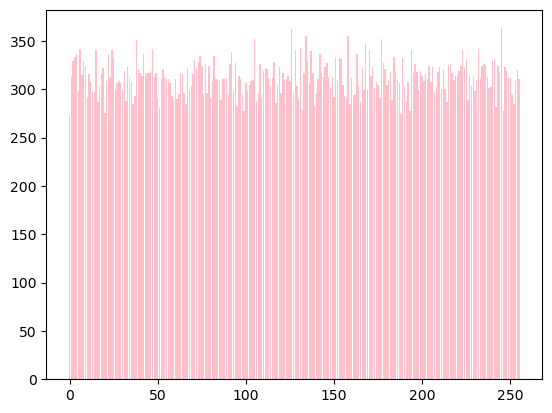

In [30]:
calc_and_plot('20k_AES_OFB.txt')

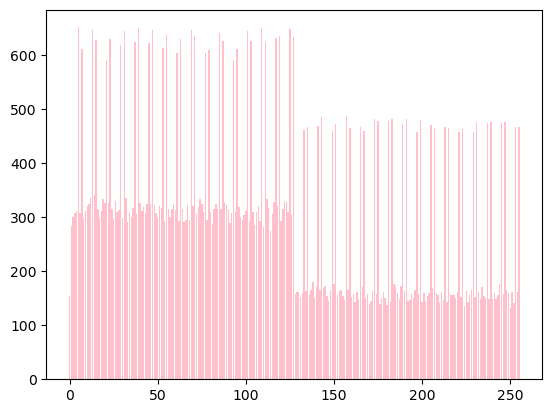

In [31]:

calc_and_plot('20k_randu.txt')


In [43]:
import math

def min_entropy(probabilities):
    """
    Calculate the min-entropy using the probabilities.
    """
    max_prob = max(probabilities.values())
    return math.log2(1/max_prob)

def shannon_entropy(probabilities):
    """
    Calculate the Shannon entropy using the probabilities.
    """
    entropy = -sum(p * math.log2(p) for p in probabilities.values() if p > 0)
    return entropy

def analyze_file(file_path):
    """
    Analyze the file to calculate min-entropy and Shannon entropy.
    """

    frequencies, total_count = process_data_in_file(file_path, {})
    probabilities = {byte: count / total_count for byte, count in frequencies.items()}
    min_ent = min_entropy(probabilities)
    shannon_ent = shannon_entropy(probabilities)

    return min_ent, shannon_ent

In [50]:
file_path = "test_20k_AES_OFB.txt"

min_ent, shannon_ent = analyze_file(file_path)
print(f"Min-Entropy: {min_ent/8:.4f} bits")
print(f"Shannon Entropy: {shannon_ent/8:.4f} bits")

Min-Entropy: 0.9708 bits
Shannon Entropy: 0.9997 bits


In [52]:
file_path = "test_20k_randu.txt"

min_ent, shannon_ent = analyze_file(file_path)
print(f"Min-Entropy: {min_ent/8:.4f} bits")
print(f"Shannon Entropy: {shannon_ent/8:.4f} bits")

Min-Entropy: 0.8654 bits
Shannon Entropy: 0.9784 bits


In [59]:
from collections import Counter

def analyze_file_per_bit(file_path):
    """
    Analyze the file to calculate min-entropy and Shannon entropy.
    """

    byte_frequencies, byte_total_count = process_data_in_file(file_path, {})

    bit_frequencies = Counter()
    for byte, count in byte_frequencies.items():
        bits = bin(byte)[2:].zfill(8)
        for bit in bits:
            bit_frequencies[int(bit)] += count  
            
    bit_total_count = byte_total_count * 8

    probabilities = {bit: count / bit_total_count for bit, count in bit_frequencies.items()}

    min_ent = min_entropy(probabilities)
    shannon_ent = shannon_entropy(probabilities)

    return min_ent, shannon_ent

In [60]:
file_path = "test_20k_AES_OFB.txt"

min_ent, shannon_ent = analyze_file_per_bit(file_path)
print(f"Min-Entropy: {min_ent:.4f} bits")
print(f"Shannon Entropy: {shannon_ent:.4f} bits")

Min-Entropy: 0.9977 bits
Shannon Entropy: 1.0000 bits


In [61]:
file_path = "test_20k_randu.txt"

min_ent, shannon_ent = analyze_file_per_bit(file_path)
print(f"Min-Entropy: {min_ent:.4f} bits")
print(f"Shannon Entropy: {shannon_ent:.4f} bits")

Min-Entropy: 0.9558 bits
Shannon Entropy: 0.9993 bits
